# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loading The Dataset and displaying contents

In [2]:
data=pd.read_excel('analysis_freq.xlsx')

In [3]:
data

,0.5mm(amp),0.5(freq),1mm(amp),1(freq),2mm(amp),2(freq),3mm(amp),3(freq),4mm(amp),4(freq),5mm(amp),5(freq)
0,4.769968,151.083067,5.599611,115.379825,5.509277,123.877915,5.590371,119.375506,5.268048,122.369164,5.706659,121.942857
1,4.626305,145.123173,5.614125,117.712892,5.563828,126.385436,5.568672,127.600208,5.378936,124.617869,5.751337,114.783962
2,4.700993,125.673697,5.765553,122.949516,5.522897,111.962375,5.590042,128.729120,5.521653,135.582505,5.804444,125.330394
3,4.867828,127.110656,5.766779,135.255847,5.423711,133.030562,5.599939,139.276596,5.630483,124.353349,5.814724,125.209096
4,4.789515,119.671168,5.623718,136.965070,5.393339,121.492703,5.626181,122.447631,5.698217,116.403005,5.875899,118.776776
5,5.132128,102.871349,5.583130,124.827898,5.309975,120.977155,5.651336,109.880196,5.796277,121.432950,6.032838,122.626667
6,4.974270,130.173157,5.540886,114.214592,5.415180,121.953067,5.723109,125.429437,5.878625,115.907369,6.138896,132.208281
7,5.400324,125.814155,5.445748,125.120581,5.421538,119.266899,5.807013,127.895115,6.087462,133.852970,6.372026,118.389429
8,5.170366,129.498890,5.510459,116.946801,5.492639,126.789222,5.956821,127.072837,6.288648,121.294783,6.551025,115.730150
9,5.243034,122.703818,5.485095,127.442191,5.657863,122.725575,6.120979,118.367058,6.471039,107.465904,6.819553,125.331846


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0.5mm(amp)  32 non-null     float64
 1   0.5(freq)   32 non-null     float64
 2   1mm(amp)    32 non-null     float64
 3   1(freq)     32 non-null     float64
 4   2mm(amp)    32 non-null     float64
 5   2(freq)     32 non-null     float64
 6   3mm(amp)    32 non-null     float64
 7   3(freq)     32 non-null     float64
 8   4mm(amp)    32 non-null     float64
 9   4(freq)     32 non-null     float64
 10  5mm(amp)    32 non-null     float64
 11  5(freq)     32 non-null     float64
dtypes: float64(12)
memory usage: 3.1 KB


In [5]:
data['0.5(freq)'].describe()

count     32.000000
mean     129.210470
std        8.449900
min      102.871349
25%      126.225366
50%      129.121667
75%      133.708322
max      151.083067
Name: 0.5(freq), dtype: float64

# Getting additional Information through visualisation

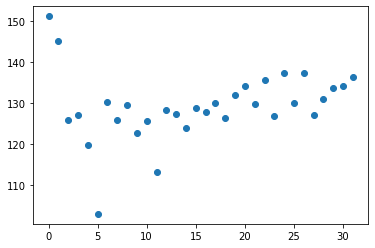

In [6]:
a=list()
for i in range(32):
    a.append(i)   
plt.scatter(x=a,y=data['0.5(freq)'])

<AxesSubplot:xlabel='0.5(freq)'>

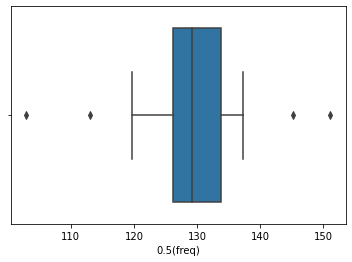

In [7]:
sns.boxplot(x=data['0.5(freq)'])

# Treating anomalies

In [8]:
q1=data['0.5(freq)'].quantile(.25)
q3=data['0.5(freq)'].quantile(.75)
q1,q3

(126.22536637754642, 133.7083220578861)

In [9]:
iqr=q3-q1
iqr

7.4829556803396855

In [10]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(144.93275557839564, 115.0009328570369)

In [11]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [12]:
data['0.5(freq)']=data['0.5(freq)'].apply(limit_imputer)

In [13]:
data['0.5(freq)'].describe()

count     32.000000
mean     129.451861
std        6.776910
min      115.000933
25%      126.225366
50%      129.121667
75%      133.708322
max      144.932756
Name: 0.5(freq), dtype: float64

<AxesSubplot:xlabel='0.5(freq)'>

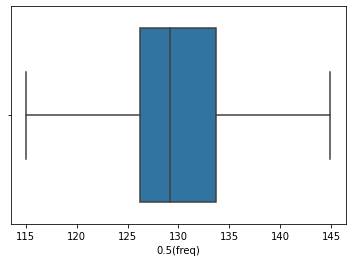

In [14]:
sns.boxplot(x=data['0.5(freq)'])

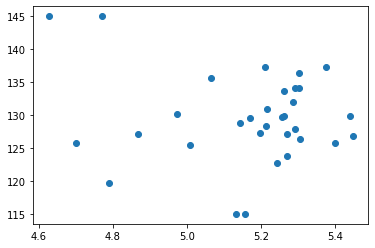

In [15]:
plt.scatter(x=data['0.5mm(amp)'],y=data['0.5(freq)'])

# Getting correlation between various variables

In [16]:
data.corr()

,0.5mm(amp),0.5(freq),1mm(amp),1(freq),2mm(amp),2(freq),3mm(amp),3(freq),4mm(amp),4(freq),5mm(amp),5(freq)
0.5mm(amp),1.000000,-0.146323,-0.032309,0.028854,0.545110,-0.199983,0.671611,-0.644586,0.626290,-0.592310,0.546443,-0.552625
0.5(freq),-0.146323,1.000000,0.235082,-0.149393,0.348404,-0.187529,0.296081,-0.281866,0.322197,-0.355097,0.337149,-0.390062
1mm(amp),-0.032309,0.235082,1.000000,0.234579,0.504923,-0.684974,0.416853,-0.336996,0.499523,-0.470293,0.580678,-0.554387
1(freq),0.028854,-0.149393,0.234579,1.000000,0.180499,-0.117210,0.110783,-0.166318,0.159430,-0.121873,0.188277,-0.114601
2mm(amp),0.545110,0.348404,0.504923,0.180499,1.000000,-0.555570,0.949309,-0.888035,0.964871,-0.922973,0.971518,-0.930967
2(freq),-0.199983,-0.187529,-0.684974,-0.117210,-0.555570,1.000000,-0.506156,0.500267,-0.577287,0.556970,-0.642105,0.593257
3mm(amp),0.671611,0.296081,0.416853,0.110783,0.949309,-0.506156,1.000000,-0.930539,0.989119,-0.970015,0.947669,-0.949560
3(freq),-0.644586,-0.281866,-0.336996,-0.166318,-0.888035,0.500267,-0.930539,1.000000,-0.922961,0.915868,-0.886326,0.882221
4mm(amp),0.626290,0.322197,0.499523,0.159430,0.964871,-0.577287,0.989119,-0.922961,1.000000,-0.977523,0.974617,-0.972733
4(freq),-0.592310,-0.355097,-0.470293,-0.121873,-0.922973,0.556970,-0.970015,0.915868,-0.977523,1.000000,-0.939588,0.961216


# Training The model 
## [Target variable=0.5(freq)]

In [17]:
X = data.drop(columns=['0.5(freq)'])
y = data['0.5(freq)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
svm = SVR(kernel='rbf')  
svm.fit(X_train, y_train)

SVR()

# Testing the model

In [20]:
y_pred = svm.predict(X_test)

# Accuracy and error calculations

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 17.397102077802064
Root Mean Squared Error: 4.17098334662248
Mean Absolute Error: 3.5676132006541468
R-squared: 0.08460027087662203


# Resulting prediction

In [23]:
print("First few predictions:")
for a in y_pred:
    print(a)

First few predictions:
129.86573441814517
127.80907458342558
129.39661168870904
128.2036250495358
127.34498954902679
127.41235905512082
130.1911768120736
